In [ ]:
!pip install AdvancedAnalytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.2 MB/s eta 0:00:00


**Load packages for data manipulation and visualization**

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tools.eval_measures as em
from AdvancedAnalytics.ReplaceImputeEncode import DT, ReplaceImputeEncode
from AdvancedAnalytics.Regression          import logreg, stepwise
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import label_binarize
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE  # Import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

**Create Attributes Map from Data Dictionary**

In [ ]:
attribute_map = {
    'age':     [DT.Interval,(19, 120)],
    'amount':  [DT.Interval,(0, 20000)],
    'duration':[DT.Interval,(1,72)],
    'checking':[DT.Nominal,(1, 2, 3, 4)],
    'coapp':   [DT.Nominal,(1,2,3)],
    'depends': [DT.Binary,(1,2)],
    'employed':[DT.Nominal,(1,2,3,4,5)],
    'existcr': [DT.Nominal,(1,2,3,4)],
    'foreign': [DT.Binary,(1,2)],
    'good_bad':[DT.Binary,('bad', 'good')], #'good' is the event=1
    'history': [DT.Nominal,(0,1,2,3,4)],
    'housing': [DT.Nominal,(1, 2, 3)],
    'installp':[DT.Nominal,(1,2,3,4)],
    'job':     [DT.Nominal,(1,2,3,4)],
    'marital': [DT.Nominal,(1,2,3,4)],
    'other':   [DT.Nominal,(1,2,3)],
    'property':[DT.Nominal,(1,2,3,4)],
    'purpose': [DT.Ignore,('0','1','2','3','4' ,'5', '6', '8','9', 'X')],
    'resident':[DT.Nominal,(1,2,3,4)],
    'savings': [DT.Nominal,(1,2,3,4,5)],
    'telephon':[DT.Binary,(1,2)]
}



**Load Data**

In [ ]:

df = pd.read_excel(r'/content/CreditHistory_Clean.xlsx')
display(df)

,age,amount,duration,checking,history,purpose,savings,employed,installp,marital,coapp,resident,property,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,67,1169,6,1,4,3,5,5,4,3,1,4,1,3,2,2,3,1,2,1,good
1,22,5951,48,2,2,3,1,3,2,2,1,2,1,3,2,1,3,1,1,1,bad
2,49,2096,12,4,4,6,1,4,2,3,1,3,1,3,2,1,2,2,1,1,good
3,45,7882,42,1,2,2,1,4,2,3,3,4,2,3,3,1,3,2,1,1,good
4,53,4870,24,1,3,0,1,3,3,3,1,4,4,3,3,2,3,2,1,1,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1736,12,4,2,2,1,4,3,2,1,4,1,3,2,1,2,1,1,1,good
996,40,3857,30,1,2,1,1,3,4,1,1,4,2,3,2,1,4,1,2,1,good
997,38,804,12,4,2,3,1,5,4,3,1,4,3,3,2,1,3,1,1,1,good
998,23,1845,45,1,2,3,1,3,4,3,1,4,4,3,3,1,3,1,2,1,bad


**Replace Impute and Encode Data for Model Building**

In [ ]:
target = 'good_bad'
# Step 1: Map 'good_bad' to binary values (0 for 'bad', 1 for 'good')
df[target] = df[target].map({'bad': 0, 'good': 1})
df = pd.read_excel(r'/content/CreditHistory_Clean.xlsx')

rie = ReplaceImputeEncode(data_map=attribute_map, binary_encoding = 'one-hot',
                          nominal_encoding='one-hot', no_impute=[target],
                          drop=True, display=True)
encoded_df = rie.fit_transform(df)


********** Data Preprocessing ***********
Features Dictionary Contains:
3 Interval, 
4 Binary, 
13 Nominal, and 
1 Excluded Attribute(s).

Data contains 1000 observations & 21 columns.


Attribute Counts
............... Missing  Outliers
age.......         0         0
amount....         0         0
duration..         0         0
checking..         0         0
coapp.....         0         0
depends...         0         0
employed..         0         0
existcr...         0         0
foreign...         0         0
good_bad..         0         0
history...         0         0
housing...         0         0
installp..         0         0
job.......         0         0
marital...         0         0
other.....         0         0
property..         0         0
purpose...         0         0
resident..         0         0
savings...         0         0
telephon..         0         0


**check encoded data**

In [ ]:
display(encoded_df)

,age,amount,duration,depends,foreign,good_bad,telephon,checking1,checking2,checking3,coapp1,coapp2,employed1,employed2,employed3,employed4,existcr1,existcr2,existcr3,history0,history1,history2,history3,housing1,housing2,installp1,installp2,installp3,job1,job2,job3,marital1,marital2,marital3,other1,other2,property1,property2,property3,resident1,resident2,resident3,savings1,savings2,savings3,savings4
0,67.0,1169.0,6.0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,22.0,5951.0,48.0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
2,49.0,2096.0,12.0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
3,45.0,7882.0,42.0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,53.0,4870.0,24.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.0,1736.0,12.0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
996,40.0,3857.0,30.0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
997,38.0,804.0,12.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
998,23.0,1845.0,45.0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


**check stat models logistic regression**

In [ ]:


print("\n********************************************************************")
print("**********  70/30 PARTITIONING DATA INTO TRAIN/VALIDATE    *********")
print("********************************************************************")

# Target and feature selection
target = 'good_bad'
y  = df[target]  # Use unencoded values for target. Sklearn uses these labels
X  = encoded_df.drop(target, axis=1)

# Split into training and validation sets
Xt, Xv, yt, yv = train_test_split(X, y, train_size=0.7, random_state=12345)

print("\n********************************************************************")
print("**********  STATSMODELS LOGISTIC REG - Target: 'good_bad'  *********")
print("**********  ALL ATTRIBUTES LOGISTIC REGRESSION             *********")
print("********************************************************************")

# Statsmodels requires the target to be encoded
y_train = label_binarize(yt, classes=['bad', 'good']).flatten()  # Flatten to convert it into 1D array
Xc = sm.add_constant(Xt)  # Add intercept (constant term)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, Xc)
results = model.fit(method='nm', maxiter=15000)

# Print summary of the model
print(results.summary())

print("****** All Attributes Metrics *****")
conf_matrix_train = results.pred_table(threshold=0.5)  # Training confusion matrix




********************************************************************
**********  70/30 PARTITIONING DATA INTO TRAIN/VALIDATE    *********
********************************************************************

********************************************************************
**********  STATSMODELS LOGISTIC REG - Target: 'good_bad'  *********
**********  ALL ATTRIBUTES LOGISTIC REGRESSION             *********
********************************************************************
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  700
Model:                          Logit   Df Residuals:                      654
Method:                           MLE   Df Model:                           45
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                  0.1231
Time:                        18:56:12   Log-Likelihood:                -383.45
converged:                      False   L

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Logistic Regression Model Evaluation**

                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      654
Method:                           MLE   Df Model:                           45
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                  0.1231
Time:                        19:05:12   Log-Likelihood:                -383.45
converged:                      False   LL-Null:                       -437.29
Covariance Type:            nonrobust   LLR p-value:                 4.705e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5417      6.043      0.255      0.799     -10.303      13.386
age            0.0356      0.010      3.477      0.001       0.016       0.056
amount     -5.613e-05   4.62e-05     -1.216      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 1000x500 with 0 Axes>

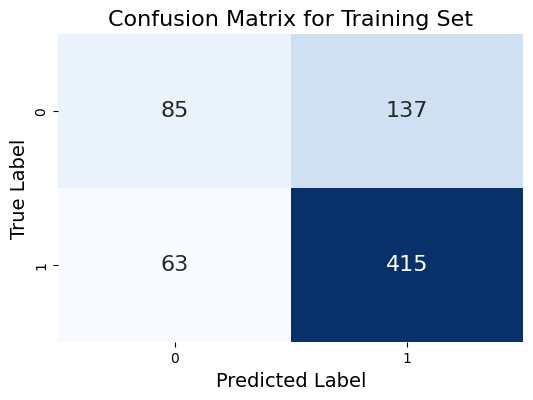

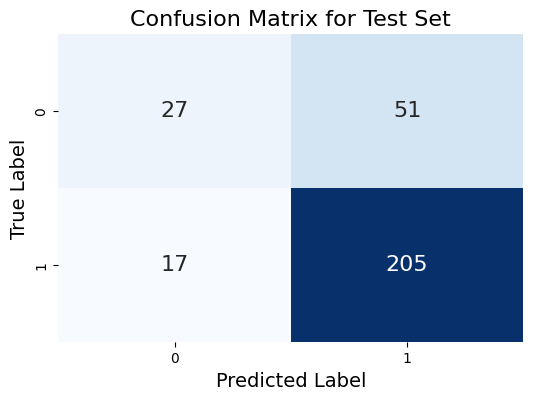

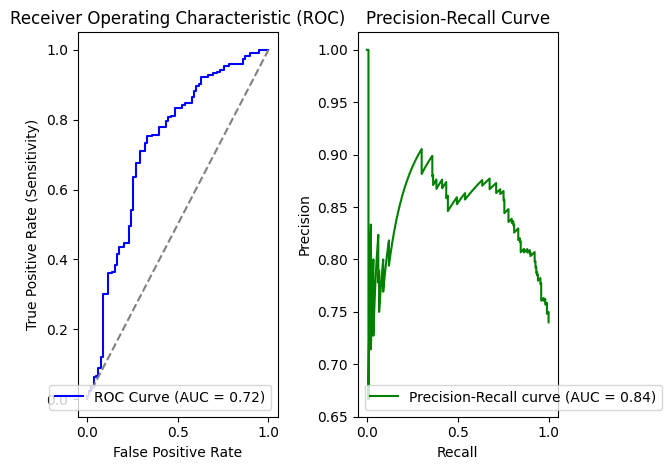

In [ ]:
# Target and feature selection
target = 'good_bad'
y  = encoded_df[target]  # Use unencoded values for target. Sklearn uses these labels
X  = encoded_df.drop(target, axis=1)

# Split the data into training and validation sets (70/30 split)
Xt, Xv, yt, yv = train_test_split(encoded_df.drop(columns=[target]),
                                  encoded_df[target], train_size=0.7, random_state=12345)

# Ensure that 'yt' and 'yv' are binary (they should already be after mapping)
yt_binary = yt  # Binary values: 0 for 'bad', 1 for 'good'
yv_binary = yv  # Binary values: 0 for 'bad', 1 for 'good'

# Add constant (intercept) to the feature matrices
Xc_train = sm.add_constant(Xt)  # Training data with intercept
Xc_test = sm.add_constant(Xv)   # Validation data with intercept

# Fit the logistic regression model using Statsmodels
model = sm.Logit(yt_binary, Xc_train)  # Binary dependent variable
results = model.fit(method='nm', maxiter=15000)
logistic_model = LogisticRegression(max_iter=15000)

logistic_selected_features = X

# Print the model summary
print(results.summary())

# Calculate odds ratios from the model coefficients (log-odds to odds)
odds_ratios = np.exp(results.params)
print("Odds Ratios:")
print(odds_ratios)

# Predict on the training set
y_train_pred_prob = results.predict(Xc_train)  # Predict probabilities for training set
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Predict on the validation set
y_test_pred_prob = results.predict(Xc_test)  # Predict probabilities for validation set
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics for training set
conf_matrix_train = confusion_matrix(yt_binary, y_train_pred)
train_accuracy = accuracy_score(yt_binary, y_train_pred) * 100
train_precision = precision_score(yt_binary, y_train_pred) * 100
train_recall = recall_score(yt_binary, y_train_pred) * 100
train_f1 = f1_score(yt_binary, y_train_pred) * 100
train_specificity = (conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])) * 100
train_miscalculations = (conf_matrix_train[0, 1] + conf_matrix_train[1, 0]) / len(yt_binary) * 100

# Calculate metrics for test (validation) set
conf_matrix_test = confusion_matrix(yv_binary, y_test_pred)
test_accuracy = accuracy_score(yv_binary, y_test_pred) * 100
test_precision = precision_score(yv_binary, y_test_pred) * 100
test_recall = recall_score(yv_binary, y_test_pred) * 100
test_f1 = f1_score(yv_binary, y_test_pred) * 100
test_specificity = (conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])) * 100
test_miscalculations = (conf_matrix_test[0, 1] + conf_matrix_test[1, 0]) / len(yv_binary) * 100

# Create a DataFrame to display the metrics for both training and test sets
print("*******************************************************************")
print("*******************************************************************")
print("\nMetrics for Training and Test Sets:")
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy (%)', 'Precision (%)', 'Recall (Sensitivity) (%)', 'Specificity (%)', 'F1 Score (%)', 'Miscalculations (%)'],
    'Training Set': [train_accuracy, train_precision, train_recall, train_specificity, train_f1, train_miscalculations],
    'Test Set': [test_accuracy, test_precision, test_recall, test_specificity, test_f1, test_miscalculations]
})
print("*******************************************************************")
print("*******************************************************************")

# Display the DataFrame with the metrics side by side
print(metrics_df)

# Plot ROC and Precision-Recall curves for the test set (you can do similar for the training set)
fpr, tpr, _ = roc_curve(yv_binary, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(yv_binary, y_test_pred_prob)
precision_recall_auc = auc(recall_vals, precision_vals)

# Plot ROC and Precision-Recall curves
plt.figure(figsize=(10, 5))

# Increase right margin to make room for the metrics
plt.subplots_adjust(right=0.7)

# Plot confusion matrix for the training set
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Training Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

# Plot confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Test Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_vals, precision_vals, color='green', label=f'Precision-Recall curve (AUC = {precision_recall_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Function to calculate metrics and display confusion matrix
def calculate_metrics(y_true, y_pred, y_prob):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    specificity = (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])) * 100
    miscalculations = (conf_matrix[0, 1] + conf_matrix[1, 0]) / len(y_true) * 100

    return accuracy, precision, recall, specificity, f1, miscalculations, conf_matrix

# Calculate metrics for logistic model on the training set
logistic_train_metrics = calculate_metrics(yt_binary, y_train_pred, y_train_pred_prob)

# Calculate metrics for logistic model on the test set
logistic_test_metrics = calculate_metrics(yv_binary, y_test_pred, y_test_pred_prob)


**Stepwise Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected features (forward): Index(['foreign', 'checking1', 'checking2', 'checking3', 'coapp2', 'history0',
       'history1', 'history2', 'history3', 'other1', 'other2', 'savings4'],
      dtype='object')
   Selected Features Dropped Features
0            foreign              age
1          checking1           amount
2          checking2         duration
3          checking3          depends
4             coapp2         telephon
5           history0           coapp1
6           history1        employed1
7           history2        employed2
8           history3        employed3
9             other1        employed4
10            other2         existcr1
11          savings4         existcr2
12               NaN         existcr3
13               NaN         housing1
14               NaN         housing2
15               NaN        installp1
16               NaN        installp2
17               NaN        installp3
18               NaN             job1
19               NaN             j

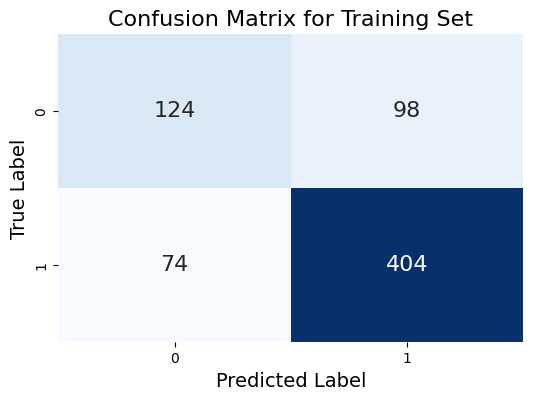

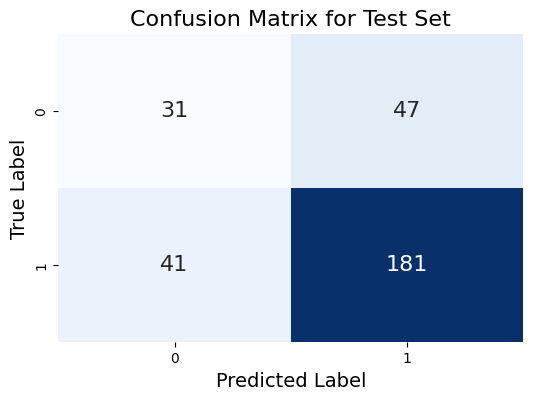

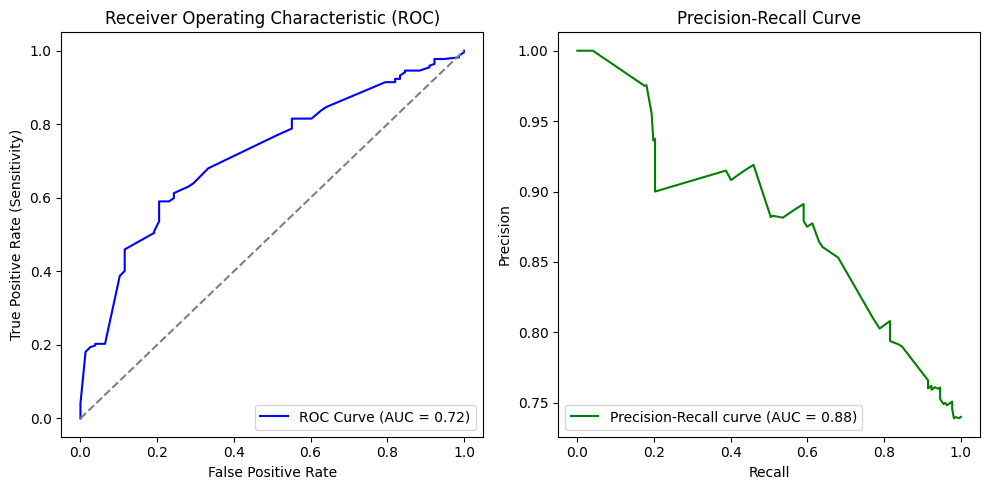

In [ ]:
# Target and feature selection
target = 'good_bad'
y  = encoded_df[target]  # Use unencoded values for target. Sklearn uses these labels
X  = encoded_df.drop(target, axis=1)

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12345)

# Stepwise Selection Function
def stepwise_selection(X, y, method='forward', n_features_to_select=None, feature_names=None):
    """Performs stepwise feature selection using RFE."""

    model = LogisticRegression(max_iter=1000, solver='lbfgs')

    # Use Recursive Feature Elimination (RFE)
    if method == 'forward':
        rfe = RFE(model, n_features_to_select=n_features_to_select, step=1)
        rfe = rfe.fit(X, y)
        print(f"Selected features (forward): {feature_names[rfe.support_]}")
    elif method == 'backward':
        rfe = RFE(model, n_features_to_select=n_features_to_select, step=1)
        rfe = rfe.fit(X, y)
        print(f"Selected features (backward): {feature_names[rfe.support_]}")
    else:
        raise ValueError("Method should be 'forward' or 'backward'")

    return rfe.support_

# Assuming `X_train`, `X_test`, `y_train`, `y_test` are pre-defined and **unscaled**
# Use the original DataFrame feature names for reference
feature_names = X.columns

# Run stepwise selection (e.g., forward selection) on **unscaled** data
selected_features_mask = stepwise_selection(X_train, y_train, method='forward', n_features_to_select=12, feature_names=feature_names)

# Display selected and dropped features
def display_selected_and_dropped_features(rfe_support, feature_names):
    """Creates a table showing selected and dropped features."""
    feature_selection = pd.DataFrame({'Feature': feature_names, 'Selected': rfe_support})

    selected_features = feature_selection[feature_selection['Selected'] == True]['Feature'].tolist()
    dropped_features = feature_selection[feature_selection['Selected'] == False]['Feature'].tolist()

    selected_dropped_df = pd.DataFrame({
        'Selected Features': pd.Series(selected_features),
        'Dropped Features': pd.Series(dropped_features)
    })
    print(selected_dropped_df)

display_selected_and_dropped_features(selected_features_mask, feature_names)

# Train logistic regression model with selected features on **unscaled** data
X_train_selected = X_train.loc[:, selected_features_mask]
X_test_selected = X_test.loc[:, selected_features_mask]
stepwise_selected_features = X_train_selected

# Compute coefficients, p-values, and VIF using StatsModels
def compute_vif_and_stats(X_train_selected, y_train):
    """Computes VIF, coefficients, and p-values using StatsModels."""

    # Add constant for intercept
    X_train_selected_const = sm.add_constant(X_train_selected)

    # Fit logistic regression model using StatsModels
    logit_model = sm.Logit(y_train, X_train_selected_const)
    results = logit_model.fit()

    # Get coefficients and p-values
    coefficients = results.params[1:]  # Exclude the intercept
    p_values = results.pvalues[1:]     # Exclude the intercept

    # Compute VIF
    vif_values = [variance_inflation_factor(X_train_selected_const, i) for i in range(1, X_train_selected_const.shape[1])]

    return coefficients, p_values, vif_values, results.summary(), np.exp(results.params[1:])

coefficients, p_values, vif_values, model_summary, odds_ratios = compute_vif_and_stats(X_train_selected, y_train)

# Display coefficients, p-values, VIF, and Odds Ratios
selected_features_stats = pd.DataFrame({
    'Selected Feature': feature_names[selected_features_mask],
    'Coefficient': coefficients,
    'P-Value': p_values,
    'VIF': vif_values,
    'Odds Ratio': odds_ratios
})

print("*******************************************************************")
print("Selected Features with Coefficients, P-Values, VIF, and Odds Ratios:")
print("*******************************************************************")
print(selected_features_stats)
print(model_summary)
print("*******************************************************************")

# Train logistic regression model using Scikit-learn with the selected features
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_selected, y_train)
stepwise_model = model

# Predict probabilities for ROC and Precision-Recall Curves
y_train_pred_prob = model.predict_proba(X_train_selected)[:, 1]  # Training set probabilities
y_test_pred_prob = model.predict_proba(X_test_selected)[:, 1]    # Test set probabilities

# Convert probabilities into binary predictions using 0.5 as the threshold
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Calculate metrics for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
train_precision = precision_score(y_train, y_train_pred) * 100
train_recall = recall_score(y_train, y_train_pred) * 100
train_f1 = f1_score(y_train, y_train_pred) * 100
train_specificity = (conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])) * 100
train_miscalculations = (conf_matrix_train[0, 1] + conf_matrix_train[1, 0]) / len(y_train) * 100

# Calculate metrics for test (validation) set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
test_precision = precision_score(y_test, y_test_pred) * 100
test_recall = recall_score(y_test, y_test_pred) * 100
test_f1 = f1_score(y_test, y_test_pred) * 100
test_specificity = (conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])) * 100
test_miscalculations = (conf_matrix_test[0, 1] + conf_matrix_test[1, 0]) / len(y_test) * 100

# Display metrics for both training and test sets side by side
print("*******************************************************************")
print("*******************************************************************")
print("\nMetrics for Training and Test Sets:")
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy (%)', 'Precision (%)', 'Recall (Sensitivity) (%)', 'Specificity (%)', 'F1 Score (%)', 'Miscalculations (%)'],
    'Training Set': [train_accuracy, train_precision, train_recall, train_specificity, train_f1, train_miscalculations],
    'Test Set': [test_accuracy, test_precision, test_recall, test_specificity, test_f1, test_miscalculations]
})
print(metrics_df)
print("*******************************************************************")
print("*******************************************************************")

# Plot confusion matrix for the training set
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Training Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

# Plot confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Test Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

# Plot ROC and Precision-Recall curves for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Precision-Recall curve for test set
precision_vals_test, recall_vals_test, _ = precision_recall_curve(y_test, y_test_pred_prob)
precision_recall_auc_test = auc(recall_vals_test, precision_vals_test)

# Plot ROC and Precision-Recall curves
plt.figure(figsize=(10, 5))

# Plot ROC curve for test set
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, color='blue', label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve for test set
plt.subplot(1, 2, 2)
plt.plot(recall_vals_test, precision_vals_test, color='green', label=f'Precision-Recall curve (AUC = {precision_recall_auc_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


# Function to calculate metrics and display confusion matrix (previously defined)
def calculate_metrics(y_true, y_pred, y_prob):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    specificity = (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])) * 100
    miscalculations = (conf_matrix[0, 1] + conf_matrix[1, 0]) / len(y_true) * 100

    return accuracy, precision, recall, specificity, f1, miscalculations, conf_matrix

# Stepwise Model Predictions (Assuming you've already trained the stepwise model)
# y_train_pred, y_test_pred: binary predictions (0 or 1)
# y_train_pred_prob, y_test_pred_prob: predicted probabilities for class 1

# Calculate metrics for the stepwise model on the training set
stepwise_train_metrics = calculate_metrics(y_train, y_train_pred, y_train_pred_prob)

# Calculate metrics for the stepwise model on the test set
stepwise_test_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_prob)



**Lasso Logistic Regression**

Selected features using Lasso: ['age', 'amount', 'duration', 'depends', 'foreign', 'telephon', 'checking1', 'checking2', 'checking3', 'coapp2', 'employed2', 'employed3', 'employed4', 'existcr1', 'history0', 'history1', 'history2', 'history3', 'housing1', 'housing2', 'installp1', 'installp2', 'installp3', 'job3', 'marital1', 'marital2', 'marital3', 'other1', 'other2', 'property1', 'resident1', 'resident2', 'resident3', 'savings1', 'savings2', 'savings4']
   Selected Features Dropped Features
0                age           coapp1
1             amount        employed1
2           duration         existcr2
3            depends         existcr3
4            foreign             job1
5           telephon             job2
6          checking1        property2
7          checking2        property3
8          checking3         savings3
9             coapp2              NaN
10         employed2              NaN
11         employed3              NaN
12         employed4              NaN
13        

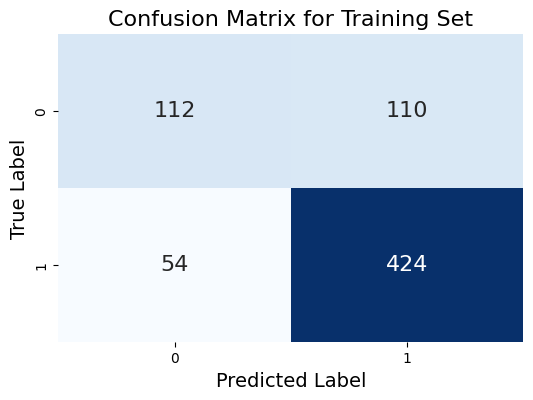

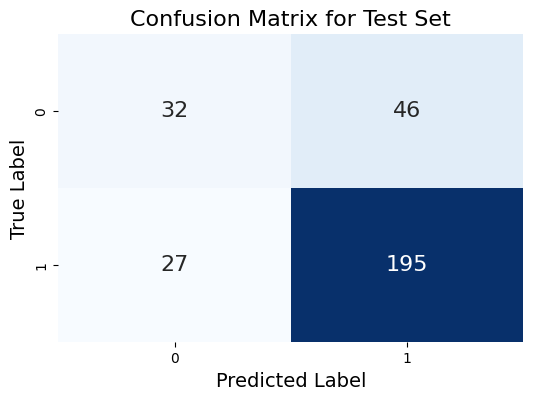

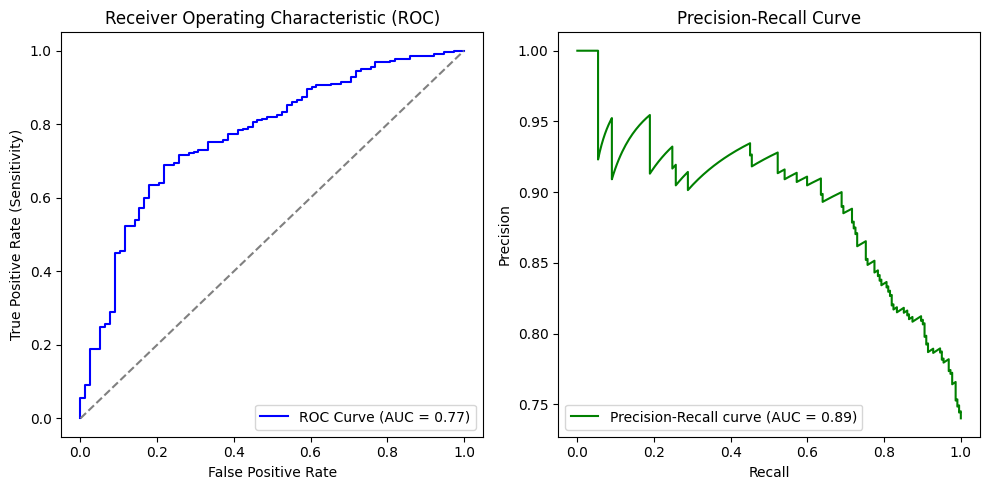

In [ ]:
# Target and feature selection
target = 'good_bad'
y = encoded_df[target]  # Use unencoded values for target. Sklearn uses these labels
X = encoded_df.drop(target, axis=1)

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12345)

# Lasso Feature Selection Function
def lasso_feature_selection(X, y, feature_names):
    """Performs feature selection using Lasso (L1 Regularization) in Logistic Regression."""

    # Logistic Regression with L1 (Lasso) penalty
    lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
    # Fit the model on the training data
    lasso.fit(X_train, y_train)

    # Get the coefficients after fitting the Lasso model
    coefficients = lasso.coef_.flatten()  # Flatten the array
    selected_features_mask = coefficients != 0  # Features selected by Lasso (non-zero coefficients)
    selected_features = feature_names[selected_features_mask]

    print(f"Selected features using Lasso: {selected_features.tolist()}")

    return selected_features, selected_features_mask, coefficients

# Function to compute VIF, p-values, and odds ratios
def compute_vif_and_stats(X_train_selected, y_train):
    """Computes VIF, coefficients, and odds ratios using StatsModels."""

    # Add constant for intercept
    X_train_selected_const = sm.add_constant(X_train_selected)

    # Fit logistic regression model using StatsModels
    logit_model = sm.Logit(y_train, X_train_selected_const)
    results = logit_model.fit()

    # Get coefficients (log odds) and p-values
    coefficients = results.params[1:]  # Exclude the intercept
    p_values = results.pvalues[1:]     # Exclude the intercept
    odds_ratios = np.exp(results.params[1:])  # Exponentiate to get odds ratios

    # Compute VIF
    vif_values = [variance_inflation_factor(X_train_selected_const.values, i) for i in range(1, X_train_selected_const.shape[1])]

    return coefficients, p_values, vif_values, odds_ratios, results.summary()

# Function to display selected and dropped features
def display_selected_and_dropped_features(selected_features, selected_features_mask, feature_names):
    """Creates a table showing selected and dropped features."""
    feature_selection = pd.DataFrame({'Feature': feature_names, 'Selected': selected_features_mask})

    selected_features = feature_selection[feature_selection['Selected'] == True]['Feature'].tolist()
    dropped_features = feature_selection[feature_selection['Selected'] == False]['Feature'].tolist()

    selected_dropped_df = pd.DataFrame({
        'Selected Features': pd.Series(selected_features),
        'Dropped Features': pd.Series(dropped_features)
    })
    print(selected_dropped_df)

# Run Lasso feature selection
feature_names = X.columns
selected_features, selected_features_mask, coefficients = lasso_feature_selection(X_train, y_train, feature_names)

# Display selected and dropped features
display_selected_and_dropped_features(selected_features, selected_features_mask, feature_names)

# Select features using the boolean mask with .loc
X_train_selected = X_train.loc[:, selected_features_mask]
X_test_selected = X_test.loc[:, selected_features_mask]
lasso_seleced_features = X_train_selected

# Compute coefficients, p-values, and VIF using StatsModels
coefficients, p_values, vif_values, odds_ratios, model_summary = compute_vif_and_stats(X_train_selected, y_train)

# Display coefficients, p-values, and VIF
selected_features_stats = pd.DataFrame({
    'Selected Feature': feature_names[selected_features_mask],
    'Coefficient': coefficients,
    'P-Value': p_values,
    'VIF': vif_values,
    'Odds Ratio': odds_ratios
})

print("*******************************************************************")
print("Selected Features with Coefficients, P-Values, and VIF:")
print("*******************************************************************")
print(selected_features_stats, "\n")
print(model_summary)
print("*******************************************************************\n")

# Train logistic regression model using Scikit-learn with the selected features
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train_selected, y_train)
lasso_model = model

# Predict probabilities for ROC and Precision-Recall Curves
y_train_pred_prob = model.predict_proba(X_train_selected)[:, 1]  # Training set probabilities
y_test_pred_prob = model.predict_proba(X_test_selected)[:, 1]    # Test set probabilities

# Convert probabilities into binary predictions using 0.5 as the threshold
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Function to calculate metrics and display confusion matrix
def calculate_metrics(y_true, y_pred, y_prob):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    specificity = (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])) * 100
    miscalculations = (conf_matrix[0, 1] + conf_matrix[1, 0]) / len(y_true) * 100

    return accuracy, precision, recall, specificity, f1, miscalculations, conf_matrix

# Calculate metrics for training and test sets
train_metrics = calculate_metrics(y_train, y_train_pred, y_train_pred_prob)
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_prob)

# Calculate metrics for the Lasso model on the training set
lasso_train_metrics = train_metrics
lasso_test_metrics = test_metrics

# Display the side-by-side metrics for Training and Test Sets
print("*******************************************************************")
print("*******************************************************************")
print("\nMetrics for Training and Test Sets:")
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy (%)', 'Precision (%)', 'Recall (Sensitivity) (%)', 'Specificity (%)', 'F1 Score (%)', 'Miscalculations (%)'],
    'Training Set': train_metrics[:6],
    'Test Set': test_metrics[:6]
})
print(metrics_df)
print("*******************************************************************")
print("*******************************************************************")

# Plot confusion matrix for training set
plt.figure(figsize=(6, 4))
sns.heatmap(train_metrics[6], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Training Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(6, 4))
sns.heatmap(test_metrics[6], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Test Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

# Now, plot the ROC and Precision-Recall curves for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Precision-Recall curve for test set
precision_vals_test, recall_vals_test, _ = precision_recall_curve(y_test, y_test_pred_prob)
precision_recall_auc_test = auc(recall_vals_test, precision_vals_test)

# Plot ROC and Precision-Recall curves for the test set
plt.figure(figsize=(10, 5))

# Plot ROC curve for test set
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, color='blue', label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve for test set
plt.subplot(1, 2, 2)
plt.plot(recall_vals_test, precision_vals_test, color='green', label=f'Precision-Recall curve (AUC = {precision_recall_auc_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


**Ridge Logistic Regression**

Selected features using Ridge: ['age', 'amount', 'duration', 'depends', 'foreign', 'telephon', 'checking1', 'checking2', 'checking3', 'coapp1', 'coapp2', 'employed1', 'employed2', 'employed3', 'employed4', 'existcr1', 'existcr2', 'existcr3', 'history0', 'history1', 'history2', 'history3', 'housing1', 'housing2', 'installp1', 'installp2', 'installp3', 'job1', 'job2', 'job3', 'marital1', 'marital2', 'marital3', 'other1', 'other2', 'property1', 'property2', 'property3', 'resident1', 'resident2', 'resident3', 'savings1', 'savings2', 'savings3', 'savings4']
   Selected Features Dropped Features
0                age              NaN
1             amount              NaN
2           duration              NaN
3            depends              NaN
4            foreign              NaN
5           telephon              NaN
6          checking1              NaN
7          checking2              NaN
8          checking3              NaN
9             coapp1              NaN
10            coapp2   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


*******************************************************************
Selected Features with Coefficients (Log Odds), Odds Ratios, P-Values, and VIF:
*******************************************************************
          Selected Feature  Coefficient (Log Odds)  Odds Ratio       P-Value  \
age                    age                0.020169    1.020374  6.024928e-02   
amount              amount               -0.000103    0.999897  3.723854e-02   
duration          duration               -0.020333    0.979872  5.816807e-02   
depends            depends               -0.327630    0.720630  2.834311e-01   
foreign            foreign                1.532384    4.629200  6.551782e-02   
telephon          telephon                0.257211    1.293318  2.761655e-01   
checking1        checking1               -2.011863    0.133739  2.812843e-13   
checking2        checking2               -1.417579    0.242300  5.986436e-07   
checking3        checking3               -1.071625    0.342452  

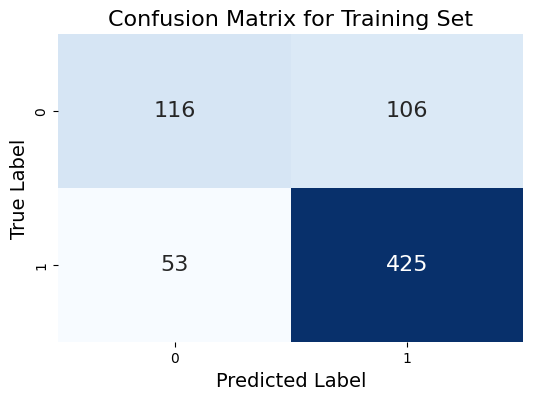

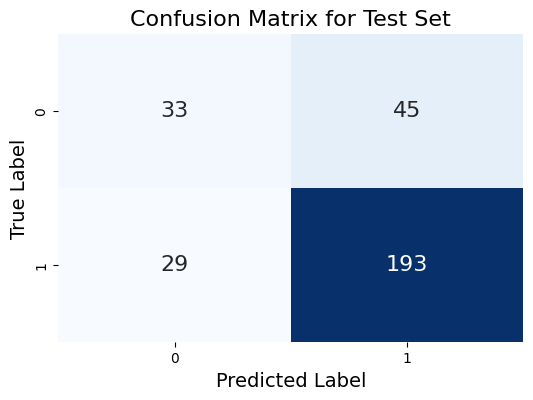

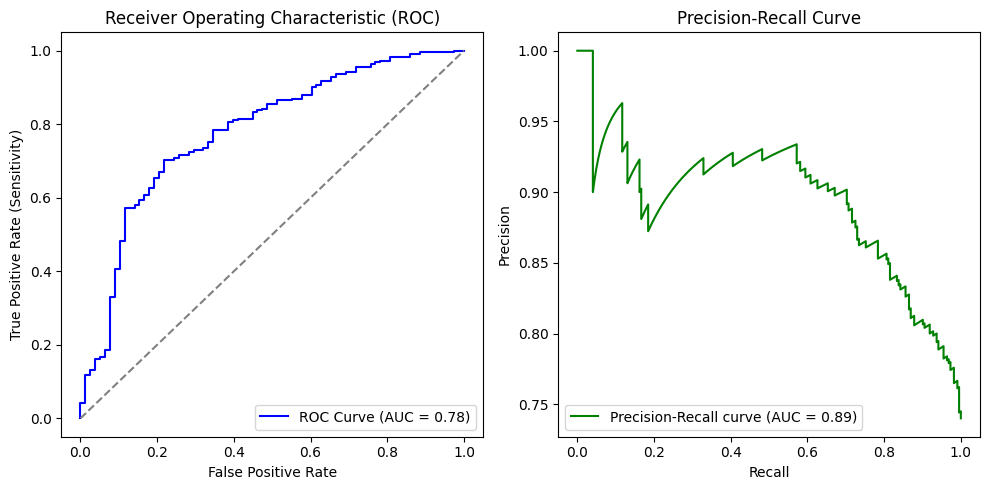

In [ ]:
# Target and feature selection
target = 'good_bad'
y = encoded_df[target]  # Use unencoded values for target. Sklearn uses these labels
X = encoded_df.drop(target, axis=1)

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12345)

# Ridge Feature Selection Function
def ridge_feature_selection(X, y, feature_names):
    """Performs feature selection using Ridge (L2 Regularization)."""

    # Use Logistic Regression with Ridge penalty
    ridge = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, C=1.0)

   # Fit the model on the training data
    ridge.fit(X_train, y_train)

    # Get the coefficients after fitting the Ridge model
    coefficients = ridge.coef_.flatten()  # Flatten to 1D array

    # Select features based on coefficients (threshold could be adjusted)
    selected_features_mask = coefficients != 0
    selected_features = feature_names[selected_features_mask]

    print(f"Selected features using Ridge: {selected_features.tolist()}")

    return selected_features, selected_features_mask, coefficients

# Function to compute VIF, p-values, and odds ratios
def compute_vif_and_stats(X_train_selected, y_train):
    """Computes VIF, coefficients (log odds), p-values, and odds ratios using StatsModels."""

    # Add constant for intercept
    X_train_selected_const = sm.add_constant(X_train_selected)

    # Fit logistic regression model using StatsModels
    logit_model = sm.Logit(y_train, X_train_selected_const)
    results = logit_model.fit()

    # Get coefficients (log odds) and p-values
    coefficients = results.params[1:]  # Exclude the intercept
    p_values = results.pvalues[1:]     # Exclude the intercept
    odds_ratios = np.exp(results.params[1:])  # Exponentiate to get odds ratios

    # Compute VIF
    vif_values = [variance_inflation_factor(X_train_selected_const.values, i) for i in range(1, X_train_selected_const.shape[1])]

    return coefficients, p_values, vif_values, odds_ratios, results.summary()

# Function to display selected and dropped features
def display_selected_and_dropped_features(selected_features_mask, feature_names):
    """Creates a table showing selected and dropped features."""
    selected_features = feature_names[selected_features_mask]
    dropped_features = feature_names[~selected_features_mask]

    selected_dropped_df = pd.DataFrame({
        'Selected Features': pd.Series(selected_features),
        'Dropped Features': pd.Series(dropped_features)
    })
    print(selected_dropped_df)
    return selected_dropped_df

# Run Ridge feature selection
feature_names = np.array(X.columns)
selected_features, selected_features_mask, coefficients = ridge_feature_selection(X_train, y_train, feature_names)

# Display selected and dropped features
selected_dropped_df = display_selected_and_dropped_features(selected_features_mask, feature_names)

# Train logistic regression model with Ridge-selected features
X_train_selected = X_train.loc[:, selected_features_mask]
X_test_selected = X_test.loc[:, selected_features_mask]

ridge_selected_features = X_train_selected

# Compute coefficients, p-values, VIF, and odds ratios using StatsModels
coefficients, p_values, vif_values, odds_ratios, model_summary = compute_vif_and_stats(X_train_selected, y_train)

# Display coefficients, p-values, VIF, and odds ratios
selected_features_stats = pd.DataFrame({
    'Selected Feature': feature_names[selected_features_mask],
    'Coefficient (Log Odds)': coefficients,
    'Odds Ratio': odds_ratios,
    'P-Value': p_values,
    'VIF': vif_values
})

print("*******************************************************************")
print("Selected Features with Coefficients (Log Odds), Odds Ratios, P-Values, and VIF:")
print("*******************************************************************")
print(selected_features_stats, "\n")
print(model_summary)
print("*******************************************************************\n")

# Train logistic regression model using Scikit-learn with the selected features
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, C=1.0)
model.fit(X_train_selected, y_train)
ridge_model = model
# Predict probabilities for ROC and Precision-Recall Curves
y_train_pred_prob = model.predict_proba(X_train_selected)[:, 1]  # Training set probabilities
y_test_pred_prob = model.predict_proba(X_test_selected)[:, 1]    # Test set probabilities

# Convert probabilities into binary predictions using 0.5 as the threshold
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Function to calculate metrics and display confusion matrix
def calculate_metrics(y_true, y_pred, y_prob):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    specificity = (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])) * 100
    miscalculations = (conf_matrix[0, 1] + conf_matrix[1, 0]) / len(y_true) * 100

    return accuracy, precision, recall, specificity, f1, miscalculations, conf_matrix

# Calculate metrics for training and test sets
train_metrics = calculate_metrics(y_train, ridge_model.predict(X_train), ridge_model.predict_proba(X_train)[:, 1])
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_prob)

# Calculate metrics for the ElasticNet model on the training set
ridge_train_metrics = train_metrics
ridge_test_metrics = test_metrics

# Display the side-by-side metrics for Training and Test Sets
print("*******************************************************************")
print("*******************************************************************")
print("\nMetrics for Training and Test Sets:")
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy (%)', 'Precision (%)', 'Recall (Sensitivity) (%)', 'Specificity (%)', 'F1 Score (%)', 'Miscalculations (%)'],
    'Training Set': train_metrics[:6],
    'Test Set': test_metrics[:6]
})
print(metrics_df)
print("*******************************************************************")
# Plot confusion matrix for training set
plt.figure(figsize=(6, 4))
sns.heatmap(train_metrics[6], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Training Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(6, 4))
sns.heatmap(test_metrics[6], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Test Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

# Now, plot the ROC and Precision-Recall curves for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Precision-Recall curve for test set
precision_vals_test, recall_vals_test, _ = precision_recall_curve(y_test, y_test_pred_prob)
precision_recall_auc_test = auc(recall_vals_test, precision_vals_test)

# Plot ROC and Precision-Recall curves for the test set
plt.figure(figsize=(10, 5))

# Plot ROC curve for test set
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, color='blue', label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve for test set
plt.subplot(1, 2, 2)
plt.plot(recall_vals_test, precision_vals_test, color='green', label=f'Precision-Recall curve (AUC = {precision_recall_auc_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()



**Elastic Net Logistic Regression**

Selected features using ElasticNet: ['age', 'amount', 'duration', 'depends', 'foreign', 'telephon', 'checking1', 'checking2', 'checking3', 'coapp1', 'coapp2', 'employed1', 'employed2', 'employed3', 'employed4', 'existcr1', 'existcr2', 'existcr3', 'history0', 'history1', 'history2', 'history3', 'housing1', 'housing2', 'installp1', 'installp2', 'installp3', 'job1', 'job2', 'job3', 'marital1', 'marital2', 'marital3', 'other1', 'other2', 'property1', 'property2', 'property3', 'resident1', 'resident2', 'resident3', 'savings1', 'savings2', 'savings3', 'savings4']
   Selected Features Dropped Features
0                age              NaN
1             amount              NaN
2           duration              NaN
3            depends              NaN
4            foreign              NaN
5           telephon              NaN
6          checking1              NaN
7          checking2              NaN
8          checking3              NaN
9             coapp1              NaN
10            coap

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


*******************************************************************
Selected Features with Coefficients (Log Odds), Odds Ratios, P-Values, and VIF:
*******************************************************************
          Selected Feature  Coefficient (Log Odds)  Odds Ratio       P-Value  \
age                    age                0.020169    1.020374  6.024928e-02   
amount              amount               -0.000103    0.999897  3.723854e-02   
duration          duration               -0.020333    0.979872  5.816807e-02   
depends            depends               -0.327630    0.720630  2.834311e-01   
foreign            foreign                1.532384    4.629200  6.551782e-02   
telephon          telephon                0.257211    1.293318  2.761655e-01   
checking1        checking1               -2.011863    0.133739  2.812843e-13   
checking2        checking2               -1.417579    0.242300  5.986436e-07   
checking3        checking3               -1.071625    0.342452  

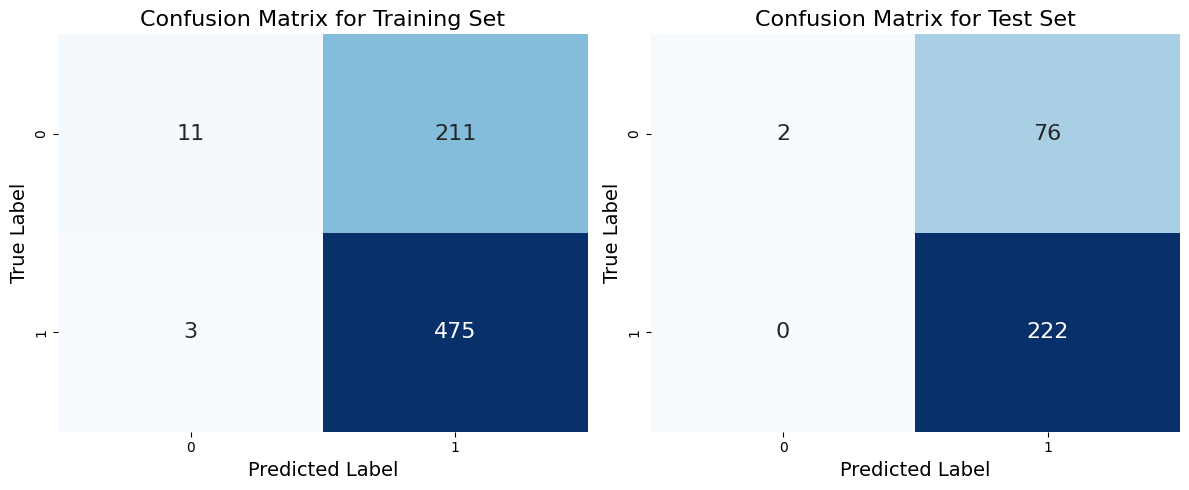

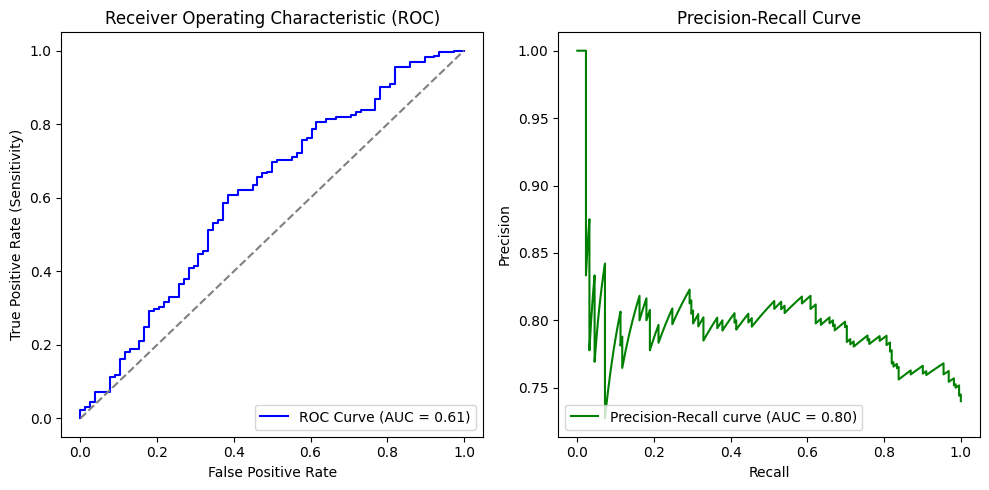

In [ ]:
# Target and feature selection
target = 'good_bad'
y  = encoded_df[target]  # Use unencoded values for target. Sklearn uses these labels
X  = encoded_df.drop(target, axis=1)

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12345)

# ElasticNet Feature Selection Function
def elasticnet_feature_selection(X, y, feature_names):
    """Performs feature selection using ElasticNet regularization in LogisticRegression."""

    # Define the ElasticNet logistic regression model
    elasticnet_model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',          # 'saga' supports elasticnet
        l1_ratio=0.2,           # Set to an appropriate value between 0 and 1
        max_iter=10000,         # Allow enough iterations for convergence
        C=0.3                  # Regularization strength (Inverse of alpha)
    )

    # Fit the model on the training data
    elasticnet_model.fit(X, y)

    # Get the coefficients from the fitted model (for binary classification)
    coefficients = elasticnet_model.coef_[0]  # Take the first row for binary classification

    # Select features based on coefficients (non-zero coefficients)
    selected_features_mask = coefficients != 0
    selected_features = feature_names[selected_features_mask]

    print(f"Selected features using ElasticNet: {selected_features.tolist()}")

    return selected_features, selected_features_mask, coefficients

# Run ElasticNet feature selection
feature_names = np.array(X.columns)
selected_features, selected_features_mask, coefficients = elasticnet_feature_selection(X_train, y_train, feature_names)

# Display selected and dropped features
selected_dropped_df = display_selected_and_dropped_features(selected_features_mask, feature_names)


# Function to compute VIF, p-values, and odds ratios
def compute_vif_and_stats(X_train_selected, y_train):
    """Computes VIF, coefficients (log odds), p-values, and odds ratios using StatsModels."""

    # Add constant for intercept
    X_train_selected_const = sm.add_constant(X_train_selected)

    # Fit logistic regression model using StatsModels
    logit_model = sm.Logit(y_train, X_train_selected_const)
    results = logit_model.fit()

    # Get coefficients (log odds) and p-values
    coefficients = results.params[1:]  # Exclude the intercept
    p_values = results.pvalues[1:]     # Exclude the intercept
    odds_ratios = np.exp(results.params[1:])  # Exponentiate to get odds ratios

    # Compute VIF
    vif_values = [variance_inflation_factor(X_train_selected_const.values, i) for i in range(1, X_train_selected_const.shape[1])]

    return coefficients, p_values, vif_values, odds_ratios, results.summary()

# Function to display selected and dropped features
def display_selected_and_dropped_features(selected_features_mask, feature_names):
    """Creates a table showing selected and dropped features."""
    selected_features = feature_names[selected_features_mask]
    dropped_features = feature_names[~selected_features_mask]

    selected_dropped_df = pd.DataFrame({
        'Selected Features': pd.Series(selected_features),
        'Dropped Features': pd.Series(dropped_features)
    })
    print(selected_dropped_df)
    return selected_dropped_df

# Run ElasticNet feature selection
feature_names = np.array(X.columns)
selected_features, selected_features_mask, coefficients = elasticnet_feature_selection(X_train, y_train, feature_names)

# Display selected and dropped features
selected_dropped_df = display_selected_and_dropped_features(selected_features_mask, feature_names)

# Train logistic regression model with ElasticNet-selected features
X_train_selected = X_train.loc[:, selected_features_mask]
X_test_selected = X_test.loc[:, selected_features_mask]
elasticnet_selected_features = X_train_selected

# Compute coefficients, p-values, VIF, and odds ratios using StatsModels
coefficients, p_values, vif_values, odds_ratios, model_summary = compute_vif_and_stats(X_train_selected, y_train)

# Display coefficients, p-values, VIF, and odds ratios
selected_features_stats = pd.DataFrame({
    'Selected Feature': feature_names[selected_features_mask],
    'Coefficient (Log Odds)': coefficients,
    'Odds Ratio': odds_ratios,
    'P-Value': p_values,
    'VIF': vif_values
})

print("*******************************************************************")
print("Selected Features with Coefficients (Log Odds), Odds Ratios, P-Values, and VIF:")
print("*******************************************************************")
print(selected_features_stats, "\n")
print(model_summary)
print("*******************************************************************\n")

# Train logistic regression model using Scikit-learn with the selected features
model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',          # 'saga' supports elasticnet
        l1_ratio=0.5,           # Set to an appropriate value between 0 and 1
        max_iter=10000,         # Allow enough iterations for convergence
        C=1.0                   # Regularization strength (Inverse of alpha)
    )
model.fit(X_train_selected, y_train)
elasticnet_model = model

# Predict probabilities for ROC and Precision-Recall Curves
y_train_pred_prob = model.predict_proba(X_train_selected)[:, 1]  # Training set probabilities
y_test_pred_prob = model.predict_proba(X_test_selected)[:, 1]    # Test set probabilities

# Convert probabilities into binary predictions using 0.5 as the threshold
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Function to calculate metrics and display confusion matrix
def calculate_metrics(y_true, y_pred, y_prob):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    specificity = (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])) * 100
    miscalculations = (conf_matrix[0, 1] + conf_matrix[1, 0]) / len(y_true) * 100

    return accuracy, precision, recall, specificity, f1, miscalculations, conf_matrix

# Calculate metrics for training and test sets
train_metrics = calculate_metrics(y_train, y_train_pred, y_train_pred_prob)
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_prob)

# Calculate metrics for the ElasticNet model on the training set
elasticnet_train_metrics = train_metrics
elasticnet_test_metrics = test_metrics

# Display the side-by-side metrics for Training and Test Sets
print("*******************************************************************")
print("*******************************************************************")
print("\nMetrics for Training and Test Sets:")
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy (%)', 'Precision (%)', 'Recall (Sensitivity) (%)', 'Specificity (%)', 'F1 Score (%)', 'Miscalculations (%)'],
    'Training Set': train_metrics[:6],
    'Test Set': test_metrics[:6]
})
print(metrics_df)
print("*******************************************************************")
print("*******************************************************************")

# Plot side-by-side confusion matrices for training and test sets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_metrics[6], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Training Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

plt.subplot(1, 2, 2)
sns.heatmap(test_metrics[6], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Test Set", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

plt.tight_layout()
plt.show()

# Now, plot the ROC and Precision-Recall curves for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Precision-Recall curve for test set
precision_vals_test, recall_vals_test, _ = precision_recall_curve(y_test, y_test_pred_prob)
precision_recall_auc_test = auc(recall_vals_test, precision_vals_test)

# Plot ROC and Precision-Recall curves for the test set
plt.figure(figsize=(10, 5))

# Plot ROC curve for test set
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, color='blue', label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve for test set
plt.subplot(1, 2, 2)
plt.plot(recall_vals_test, precision_vals_test, color='green', label=f'Precision-Recall curve (AUC = {precision_recall_auc_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


**Evaluate for the best model**

In [ ]:
# Function to calculate weighted score
def calculate_weighted_score(metrics, weights):
    """Calculates weighted score for a model based on given metrics and weights."""
    score = 0
    for metric, weight in zip(metrics, weights):
        score += metric * weight
    return score

# Define weights for each metric (adjust based on the importance of each metric)
weights = {
    'Accuracy (%)': 0.20,
    'Precision (%)': 0.15,
    'Recall (Sensitivity) (%)': 0.1,
    'Specificity (%)': 0.1,
    'F1 Score (%)': 0.05,
    'Miscalculations (%)': -0.20  # Lower is better, so negative weight
}

# Metrics for different models (using only test metrics)
ridge_test_metrics = ridge_test_metrics[:6]    # Replace with actual values for Ridge model (test)
lasso_test_metrics = lasso_test_metrics[:6]    # Replace with actual values for Lasso model (test)
stepwise_test_metrics = stepwise_test_metrics[:6]    # Replace with actual values for Stepwise model (test)
logistic_test_metrics = logistic_test_metrics[:6]    # Replace with actual values for Logistic model (test)
elasticnet_test_metrics = elasticnet_test_metrics[:6]    # Replace with actual values for ElasticNet model (test)

# Create a DataFrame to store only test metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy (%)', 'Precision (%)', 'Recall (Sensitivity) (%)', 'Specificity (%)', 'F1 Score (%)', 'Miscalculations (%)'],
    'Ridge Model': ridge_test_metrics,
    'Lasso Model': lasso_test_metrics,
    'Stepwise Model': stepwise_test_metrics,
    "Logistic Model": logistic_test_metrics,
    "ElasticNet Model": elasticnet_test_metrics
})

# Display metrics for comparison
display(HTML('<h2><strong>Test Metrics for Ridge, Lasso, Stepwise, Logistic, and ElasticNet Models:</strong></h2>'))
display(metrics_df)

# Calculate weighted score for each model based on test metrics
ridge_score = calculate_weighted_score(ridge_test_metrics, list(weights.values()))
lasso_score = calculate_weighted_score(lasso_test_metrics, list(weights.values()))
stepwise_score = calculate_weighted_score(stepwise_test_metrics, list(weights.values()))
logistic_score = calculate_weighted_score(logistic_test_metrics, list(weights.values()))
elasticnet_score = calculate_weighted_score(elasticnet_test_metrics, list(weights.values()))

# Display the scores for each model
model_scores = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Stepwise', 'Logistic', 'ElasticNet'],
    'Weighted Score': [ridge_score, lasso_score, stepwise_score, logistic_score, elasticnet_score]
})

display(HTML('<h2><strong>Model Scores based on Test Metrics:</strong></h2>'))
display(model_scores)

# Select the model with the highest score
best_model = model_scores.loc[model_scores['Weighted Score'].idxmax(), 'Model']
display(HTML(f'<h1><strong>The best model based on weighted test metrics is: {best_model}</strong></h1>'))




,Metric,Ridge Model,Lasso Model,Stepwise Model,Logistic Model,ElasticNet Model
0,Accuracy (%),75.333333,75.666667,70.666667,77.333333,74.666667
1,Precision (%),81.092437,80.912863,79.385965,80.078125,74.496644
2,Recall (Sensitivity) (%),86.936937,87.837838,81.531532,92.342342,100.000000
3,Specificity (%),42.307692,41.025641,39.743590,34.615385,2.564103
4,F1 Score (%),83.913043,84.233261,80.444444,85.774059,85.384615
5,Miscalculations (%),24.666667,24.333333,29.333333,22.666667,25.333333


,Model,Weighted Score
0,Ridge,39.417314
1,Lasso,39.501607
2,Stepwise,36.324296
3,Logistic,39.929528
4,ElasticNet,35.566804


In [ ]:
best_model = ridge_model  # Use the best model for predictions

best_selected_features = ridge_selected_features  # Use the selected features for predictions

# Convert best_selected_features to a list if it's not already
if not isinstance(best_selected_features, list):
    best_selected_features = list(best_selected_features)

# Create the new_data DataFrame with the given features
new_data = pd.DataFrame({
    'age': [67.0, 22.0, 49.0, 45.0, 53.0],
    'amount': [1169.0, 5951.0, 2096.0, 7882.0, 4870.0],
    'duration': [6.0, 48.0, 12.0, 42.0, 24.0],
    'depends': [0, 0, 1, 1, 1],
    'foreign': [0, 0, 0, 0, 0],
    'telephon': [1, 0, 0, 0, 0],
    'checking1': [1, 0, 0, 1, 1],
    'checking2': [0, 1, 0, 0, 0],
    'checking3': [0, 0, 0, 0, 0],
    'coapp1': [1, 1, 1, 0, 1],
    'coapp2': [0, 0, 0, 0, 0],
    'employed1': [0, 0, 0, 0, 0],
    'employed2': [0, 0, 0, 0, 0],
    'employed3': [0, 1, 0, 0, 1],
    'employed4': [0, 0, 1, 1, 0],
    'existcr1': [1, 1, 1, 1, 1],
    'existcr2': [0, 0, 0, 0, 0],
    'existcr3': [0, 0, 0, 0, 0],
    'history0': [0, 0, 0, 0, 0],
    'history1': [0, 1, 0, 0, 0],
    'history2': [0, 0, 0, 1, 0],
    'history3': [0, 0, 0, 0, 0],
    'housing1': [1, 1, 1, 0, 1],
    'housing2': [0, 0, 0, 0, 0],
    'installp1': [1, 1, 1, 0, 0],
    'installp2': [0, 0, 0, 1, 0],
    'installp3': [0, 0, 0, 0, 0],
    'job1': [0, 0, 0, 1, 1],
    'job2': [1, 1, 0, 0, 0],
    'job3': [0, 0, 1, 0, 0],
    'marital1': [0, 1, 0, 1, 1],
    'marital2': [0, 0, 1, 0, 0],
    'marital3': [0, 1, 0, 1, 1],
    'other1': [0, 0, 1, 0, 1],
    'other2': [1, 1, 0, 1, 0],
    'property1': [0, 1, 0, 0, 0],
    'property2': [1, 0, 0, 0, 1],
    'property3': [0, 0, 0, 0, 0],
    'resident1': [0, 0, 1, 1, 0],
    'resident2': [0, 0, 0, 0, 0],
    'resident3': [0, 1, 1, 1, 0],
    'savings1': [0, 1, 0, 1, 0],
    'savings2': [0, 0, 0, 0, 1],
    'savings3': [0, 1, 0, 0, 0],
    'savings4': [0, 0, 0, 0, 0]
})

# Ensure consistency between best_selected_features and new_data columns
available_features = new_data.columns.intersection(best_selected_features)

new_data_selected = new_data[available_features]  # Select only available features

# Predict the labels for the new data
new_predictions = best_model.predict(new_data_selected)

# Predict the probabilities for each class (optional)
new_probabilities = best_model.predict_proba(new_data_selected)


# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Age': new_data['age'],
    'Amount': new_data['amount'],
    'Duration': new_data['duration'],
    'Credit Status (0=Bad, 1=Good)': new_predictions,
    'Probability of Bad Credit': new_probabilities[:, 0],
    'Probability of Good Credit': new_probabilities[:, 1]
})

# Map the prediction labels to human-readable form
results_df['Credit Status Label'] = results_df['Credit Status (0=Bad, 1=Good)'].map({0: 'Bad Credit', 1: 'Good Credit'})

# Display the DataFrame
display(results_df)

,Age,Amount,Duration,"Credit Status (0=Bad, 1=Good)",Probability of Bad Credit,Probability of Good Credit,Credit Status Label
0,67.0,1169.0,6.0,1,0.117514,0.882486,Good Credit
1,22.0,5951.0,48.0,0,0.889383,0.110617,Bad Credit
2,49.0,2096.0,12.0,1,0.059950,0.940050,Good Credit
3,45.0,7882.0,42.0,0,0.742467,0.257533,Bad Credit
4,53.0,4870.0,24.0,0,0.697159,0.302841,Bad Credit
